# AI Introductory Techniques
This notebook contains a number of useful calculators as well as notes on different AI techniques. Each of the calculators is currently configured with an example, but can be changed for solving new problems. 

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import norm

# W13 - Probabilities

In [ ]:
# SUM RULE - A OR B - probability of one or other mutually exclusive event occuring
def sum_rule(pA,pB):
  return pA+pB

option1 = 0.01*0.2
option2 = 0.99*0.05

option1_OR_option2= sum_rule(option1,option2)

print("Probability = ", option1_OR_option2)

Probability =  0.051500000000000004


In [ ]:
# PRODUCT RULE - A AND B - probability of two independent events both occuring -> multiply their individual probabilities

def prod_rule(pA,pB):
  return pA*pB

wear_hat = 0.5
dance = 0.5

prob_wearHat_and_dance = prod_rule(wear_hat,dance)

print("Probability = ", prob_wearHat_and_dance)

Probability =  0.25


In [ ]:
# BAYES THEORUM - probability of x is this, given y is that.

def Bayes_Theorem(pA, pB, pBA):
    return (pBA * pA) / pB

b = 0.01
a = 0.01*0.6*0.95 + 0.01*0.4*0.9 + 0.99*0.6*0.6 + 0.99*0.4*0.01 # need to sum all 4 ways that the alarm can go off
ab = 0.6*0.95 + 0.4*0.9

prob_breakin_given_alarm = Bayes_Theorem(b,a,ab)
print(a)
print("Probability = ", prob_breakin_given_alarm)

0.36966
Probability =  0.025158253530271058


In [ ]:
# Bayesian Inference - same as bayes theorum but with the marginal being the sum of probability of collecting that data under any condition
def Bayes_Inference(pA, pBA, marginal_list):
    return (pBA * pA) / np.sum(marginal_list)

#What is probability dog is loose, given flat mate home and cake eaten?
# P(d = 1 | F=1,C=1 )
dogloose = 0.3 # prob dog loose in general
cakeeaten_if_dogandflatmate_home = 1 # probability of seeing both cake eaten and flatmate home when dog is loose
marge = [0.3*1+0.7*0.9] # list of probabilities of cake being eaten given flat mate home for all possible dog conditions (aka loose and not loose)

# print(Bayes_Inference(dogloose, cakeeaten_if_dogandflatmate_home, marge))

"""
New question
"""
forestfire = 0.052
smellsmokeIfForestFireAndCampfire = 0.99
marge = [0.052*0.99+0.948*0.8] # sum probability that we smell smoke given campfire in the case that there is and isn't forest fire

# print(Bayes_Inference(forestfire,smellsmokeIfForestFireAndCampfire,marge))


"""
New question
"""
# given dustbin fallen over, what is prob of wind? Bayes theorum m8
wind = 0.6
dustbin = 0.6*0.8 + 0.4*0.1
dustbingivenwind = 0.8

prob_of_wind_givendustbin = Bayes_Theorem(wind, dustbin, dustbingivenwind)
print(prob_of_wind_givendustbin)

brokenInto = 0.01 # broken into
alarmgoesOffgivenDustbinoverandBrokenInto = prob_of_wind_givendustbin*0.95 # same as normal but now multiply through by prob of wind as we don't know it's windy for certain
marge = [0.01*prob_of_wind_givendustbin*0.95, 0.01*(1-prob_of_wind_givendustbin)*0.9, 0.99*prob_of_wind_givendustbin*0.6,0.99*(1-prob_of_wind_givendustbin)*0.01 ]

print(Bayes_Inference(brokenInto,alarmgoesOffgivenDustbinoverandBrokenInto,marge))

0.923076923076923
0.015700532991777878


In [ ]:
# Bayesian Network - redefine for each one you have
"""
What is the probability of all these linked things happening?

It is the probability of all resultant events happening given their causal
events have happened, multiplied by the probability that the causal events will 
happen in the first place

for above, if every probability is o.5

"""
earthquake = 0.5
burglary = 0.5
radio = 0.5
earthquake_alarm = 0.5
burglary_alarm = 0.5
alarm_either = 1- (0.5*0.5) # 75% chance one of these will trigger the alarm

# what is probability that the there is an earthquake and burglary and the 
# alarm triggers and the radio triggers?
prob = alarm_either*radio*earthquake*burglary

print(alarm_either)
print(prob)

0.75
0.09375


In [ ]:
# EXPECTATION - average value of some function f(x) under a probability distribution is the EXPECTATION of f. 

#APPROXIMATED BY:
x_values = [1,2,3,4,5]
def f(x):
  return(2*x + 3)
def expectation_approximator(x_list):
  E = 0
  for i in range(len(x_list)):
    E += (1/len(x_list))*f(x_list[i])

  return(E)

expectation_fx = expectation_approximator(x_values)
print("Expectation value of f(x): ", expectation_fx)

Expectation value of f(x):  9.0


# VARIANCE - how much f(x) vvaries around the expectation
easier by hand I think. 

var[f (x)] = E(f (x) − E[f (x)])^2

var(x) = E[x^2] − E[x]^2 -> expectation of x is just mean


# COVARIANCE - how much two variables x and y vary together
https://ncalculators.com/statistics/covariance-calculator.htm

# W13 - ACC, PREC, RECALL & F1

In [ ]:
from numpy.lib.npyio import recfromcsv
# VARIABLES
TP = 3
TN = 90
FP = 5
FN = 2

# ACCURACY
acc = TP/(TP+TN+FP+FN)
print("Accuracy: ", acc,"\n")

# PRECISION
pres = TP/(TP+FP)
print("Precision: ", pres,"\n")

# RECALL
rec = TP/(TP+FN)
print("Recall: ", rec,"\n")

# F1
f1 = 2*(pres*rec/(pres+rec))
print("f1 (harmonic mean of precision and recall): ", f1,"\n")


Accuracy:  0.03 

Precision:  0.375 

Recall:  0.6 

f1 (harmonic mean of precision and recall):  0.4615384615384615 



# W13 - LINEAR REGRESSION CALCULATOR

In [ ]:
xList = [155,	162,	164,	172,	174,	180,	186,	190,	195,	198]
yList = [	38.6,	37.8,	37.6,	35.7,	35.8,	34,	35.6,	32.1,	32.6,	32]

# calculate various means
x_mean = sum(xList)/len(xList)
y_mean = sum(yList)/len(yList)
x_square_mean = 0
xy_mean = 0


for i in range(len(xList)):
      x_square_mean += xList[i]**2/len(xList)
for i in range(len(xList)):
      xy_mean += xList[i]*yList[i]/len(xList)

# calculate and print gradient and intercept
grad = (xy_mean - x_mean*y_mean)/(x_square_mean - x_mean**2)
print("gradient: ", grad, "\n")

intercept = y_mean - x_mean*grad
print("intercept: ", intercept)


gradient:  -0.1570482301800854 

intercept:  63.071765679983166


# W13 - MULTIVARIANT REGRESSION CALCULATOR

In [ ]:
# INPUT FEATURES and TARGET VALUES
a = [0.006, 0.027, 0.027]
b = [2.31, 7.07, 7.07]
c = [6.6, 6.4, 7.2]
d = [296, 242, 242]

target = [24, 21.6, 34.7]

# CONVERT FEATURES TO ARRAY, WITH FIRST COLUMN ONES

X = np.c_[np.ones(len(a)) ,a ,b ,c ,d]
Y = np.c_[target]
# print(X, Y)

# XA = Y     -> CALCULATE MINIMISED A

A = np.linalg.pinv(X).dot(Y)
print("Value of 'A' is: \n", A)
print("\n Each value is the ideal coefficient for feature a-d to map to target value.")

Value of 'A' is: 
 [[-9.89680714e-02]
 [-1.18842650e-02]
 [-2.78778640e+00]
 [ 1.63750000e+01]
 [-2.61946534e-01]]

 Each value is the ideal coefficient for feature a-d to map to target value.


# W14 - NAIVE BAYES PROBABILITIES!

In [ ]:
# NAIVE BAYES CALCULATOR
'''
PRIOR PROBABILITY: just the relative proportion of points in each class
e.g below, there are 6, 5 and 4 points in each class, therefore prior probs 
are 6/15, 5/15=1/3, 4/15.
'''
prior_class1 = 1/3
prior_class2 = 1/3
prior_class3 = 1/3

# classes with featurs a and b
Class1_a = [11.78,	10.98,	12.45,	11.04,	12.16]
Class1_b = [8.24,	8.63,	7.84,	9.01,	7.94]

Class2_a = [7.89,	7.51,	9.17,	8.32,	7.47]
Class2_b = [12.43,	13.67,	13.88,	12.18,	12.58]

Class3_a = [9.87,	9.72,	11.57,	11.24,	13.2]
Class3_b = [11.53,	11.67,	13.06,	11,	14.3]

# PRINT STANDARD DEVIATION AND MEAN
class1_a_mean = np.mean(Class1_a)
class1_a_std = np.std(Class1_a)
print("class 1 feature a, mean: ", class1_a_mean )
print("class 1 feature a, standard deviation: ", class1_a_std)
print()

class1_b_mean = np.mean(Class1_b)
class1_b_std = np.std(Class1_b)
print("class 1 feature b, mean: ", class1_b_mean )
print("class 1 feature b, standard deviation: ", class1_b_std)
print()

class2_a_mean = np.mean(Class2_a)
class2_a_std = np.std(Class2_a)
print("class 2 feature a, mean: ", class2_a_mean )
print("class 2 feature a, standard deviation: ", class2_a_std)
print()

class2_b_mean = np.mean(Class2_b)
class2_b_std = np.std(Class2_b)
print("class 2 feature b, mean: ", class2_b_mean )
print("class 2 feature b, standard deviation: ", class2_b_std)
print()

class3_a_mean = np.mean(Class3_a)
class3_a_std = np.std(Class3_a)
print("class 3 feature a, mean: ", class3_a_mean )
print("class 3 feature a, standard deviation: ", class3_a_std)
print()

class3_b_mean = np.mean(Class3_b)
class3_b_std = np.std(Class3_b)
print("class 3 feature b, mean: ", class3_b_mean )
print("class 3 feature b, standard deviation: ", class3_b_std)

class 1 feature a, mean:  11.681999999999999
class 1 feature a, standard deviation:  0.5887070578819316

class 1 feature b, mean:  8.331999999999999
class 1 feature b, standard deviation:  0.4365042955115104

class 2 feature a, mean:  8.072
class 2 feature a, standard deviation:  0.629043718671445

class 2 feature b, mean:  12.948000000000002
class 2 feature b, standard deviation:  0.6904317489803032

class 3 feature a, mean:  11.12
class 3 feature a, standard deviation:  1.2701023580798516

class 3 feature b, mean:  12.312000000000001
class 3 feature b, standard deviation:  1.2047140739611208


'\nIndependence Satisfied if: Oval surrounding the points roughly lines up with the axes\nAKA the axis of the oval roughly line up with the axis of the graph. This is\napproximated by the line of best fit shown here - if it is HEAVILY diagonal to both axes\nthen independence condition NOT satisfied.\n'

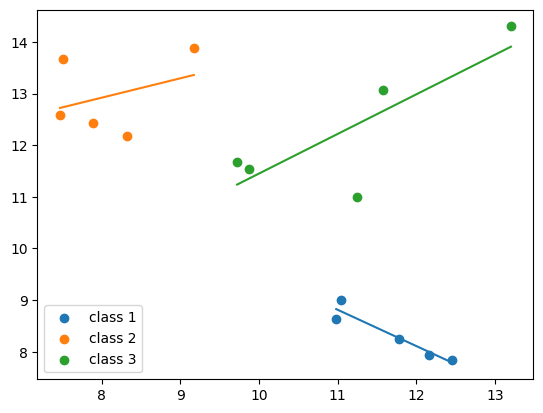

In [ ]:
# Plot class points to check independence assumption

plt.scatter(Class1_a, Class1_b, label = "class 1")
plt.plot(np.unique(Class1_a), np.poly1d(np.polyfit(Class1_a, Class1_b, 1))(np.unique(Class1_a)))
plt.scatter(Class2_a, Class2_b, label = "class 2")
plt.plot(np.unique(Class2_a), np.poly1d(np.polyfit(Class2_a, Class2_b, 1))(np.unique(Class2_a)))
plt.scatter(Class3_a, Class3_b, label = "class 3")
plt.plot(np.unique(Class3_a), np.poly1d(np.polyfit(Class3_a, Class3_b, 1))(np.unique(Class3_a)))
plt.legend()

"""
Independence Satisfied if: Oval surrounding the points roughly lines up with the axes
AKA the axis of the oval roughly line up with the axis of the graph. This is
approximated by the line of best fit shown here - if it is HEAVILY diagonal to both axes
then independence condition NOT satisfied.
"""

In [ ]:
""""
OBSOLETE

# Calculate the prob of a given feature being part of a feature of a class. 

def prob_feature_in_class(x,mean,std):

    part1 = (1/(std*math.sqrt(2*math.pi)))
    
    part2 = math.exp((-1/2)*(((x-mean)/std)**2))
    
    prob = part1*part2
    return(prob)
"""

In [ ]:
# Calculate the LOG OF prob of a given feature being part of a feature of a class. 
# recall identities, ln(exp(-1)) = -1, ln(a*b) = ln(a) + ln(b)
def LOG_prob_feature_in_class(x,mean,std):

    # part1 = math.log((1/(std*math.sqrt(2*math.pi))))
    
    # part2 = (-1/2)*(((x-mean)/std)**2)
    
    # prob = part1+part2

    prob = norm.logpdf(x,mean,std)
    return(prob)

In [ ]:
# Correctly acquires slides example solution for 1,2: 


xa,xb = 5,2
prior = 1/3

# Slides example: class 0
a_mean = 1.5
a_std = 0.14

b_mean = 0.22
b_std = 0.04


# Slides example: class 1
# a_mean = 4.24
# a_std = 0.51

# b_mean = 1.3
# b_std = 0.28



# # Slides example: class 2
# a_mean = 5.7
# a_std = 0.35

# b_mean = 2.22
# b_std = 0.23

print(math.log(prior))
print(LOG_prob_feature_in_class(xa,a_mean,a_std))
print(LOG_prob_feature_in_class(xb,b_mean,b_std))
print("L value: ", math.log(prior)+LOG_prob_feature_in_class(xa,a_mean,a_std)+LOG_prob_feature_in_class(xb,b_mean,b_std))

-1.0986122886681098
-311.4528256768317
-987.8250627083365
L value:  -1300.3765006738363


In [ ]:
xa,xb = 8.11,12.30

L_c1 = math.log(prior_class1) + LOG_prob_feature_in_class(xa,class1_a_mean,class1_a_std) + LOG_prob_feature_in_class(xb,class1_b_mean,class1_b_std)
L_c2 = math.log(prior_class2) + LOG_prob_feature_in_class(xa,class2_a_mean,class2_a_std) + LOG_prob_feature_in_class(xb,class2_b_mean,class2_b_std)
L_c3 = math.log(prior_class3) + LOG_prob_feature_in_class(xa,class3_a_mean,class3_a_std) + LOG_prob_feature_in_class(xb,class3_b_mean,class3_b_std)

print("L for class 1: ", L_c1)
print()

print("L for class 2: ", L_c2)
print()

print("L for class 3: ", L_c3)
print()

L for class 1:  -61.30290345145297

L for class 2:  -2.544752952333331

L for class 3:  -6.1700626515606904



# W15 - Euclidean Distance - KMEANS CLASSIFIER CODE

In [ ]:
# USED FOR K MEANS ALLOCATING TO CENTROIDS
# two points a and b, with x,y coords
# extend to as many feautres as required, here x and y would be features 1 and 2.

"""
# This example is from w15 slides 16.
a = np.array([3.2, 3.8]) # CENTROID 1
b = np.array([8.2, 7. ]) # CENTROID 2
points = [[10,8], [1,3], [4,3], [7,7], [4,5], [7,9], [2,2], [8,5], [5,6], [9,6] ] # POINTS TO CHECK 
"""

a = np.array([4.25, 6.75]) # CENTROID 1
b = np.array([4.5, 5. ]) # CENTROID 2

points = [[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4, 9]]
# points = [[1, 2], [1,3], [1, 4], [2,3], [3,5], [2,4], [4, 5], [3, 6]] # POINTS TO CHECK 

into_class_a = []
into_class_b = []
equidistant = []



for point in points:
  array_point = np.array(point,float)
  dist = a-array_point
  Euc_Dist_a = np.linalg.norm(dist)
  dist = b-array_point
  Euc_Dist_b = np.linalg.norm(dist)
  if Euc_Dist_a < Euc_Dist_b:
    into_class_a.append(point)
  elif Euc_Dist_b < Euc_Dist_a:
    into_class_b.append(point)
  else:
    equidistant.append(point)


print("Points in class 1 due to centroid: ", a, "\n", into_class_a, "\n")
print("Points in class 2 due to centroid: ", b, "\n", into_class_b, "\n")
print("Points in neither class due to being equidistant between centroids: ", equidistant, "\n")


# into_class_a = [[2,10], [2,5], [8,4], [5,8]]
# into_class_b = [[7,5], [6,4], [1,2], [4, 9]]
# calculate new centroids: 
new_a = np.array([0,0],float)
new_b = np.array([0,0],float)

for point in into_class_a:
  new_a[0] += point[0]/(len(into_class_a))
  new_a[1] += point[1]/(len(into_class_a))

for point in into_class_b:
  new_b[0] += point[0]/(len(into_class_b))
  new_b[1] += point[1]/(len(into_class_b))


print("New centroid for class 1: ", new_a, "\n")
print("New centroid for class 2: ", new_b, "\n")

# CONVERGENCE OCCURS ON THE ITERATION WHERE THE CENTROID POINTS REMAIN UNCHANGED
# E.G CONVERGENCE IS 4 FOR W16 Q4 AS 4 ITERATIONS ARE NEEDED FOR CENTROIDS TO
# BE UNCHANGED



Points in class 1 due to centroid:  [4.25 6.75] 
 [[2, 10], [5, 8], [4, 9]] 

Points in class 2 due to centroid:  [4.5 5. ] 
 [[2, 5], [8, 4], [7, 5], [6, 4], [1, 2]] 

Points in neither class due to being equidistant between centroids:  [] 

New centroid for class 1:  [3.66666667 9.        ] 

New centroid for class 2:  [4.8 4. ] 



# W15 - Manhattan Distance

In [ ]:
# two points a and b, with x,y coords
# extend to as many feautres as required, here x and y would be features 1 and 2.
a = np.array([30,45])
b = np.array([60,90])

dist = a-b
man_dist = 0

for i in range(np.shape(dist)[0]):
  man_dist += abs(dist[i])


print("Manhatten distance between points: ", man_dist)

Manhatten distance between points:  75


#W15 - Hamming distance 
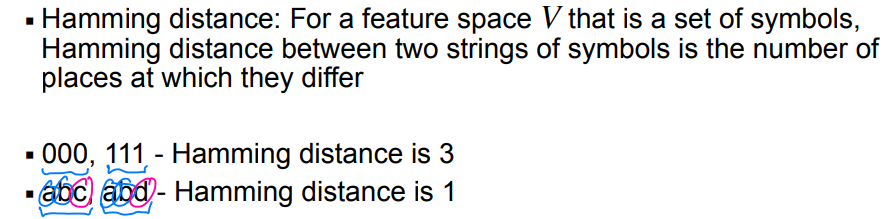

# W15 - k-means clustering

partition set of vectors into k clusters: 

1. partition randomly into k clusters
2. find centroid of each cluster
3. relabel each vector to the cluster of the closest centroid
4. steps 2 & 3 repeat until no change (convergence) in vector classes


k means aims to minimise the inertia ( J(P) ) in each cluster

**drawbacks:** 
- Assumes that clusters are spherical and **equally sized**
- Number of clusters is an input parameter -> not calculated for optimal value
- Can converge to local minima

## Elbow Plots
help identify optimal number of clusters
plot J(P)  *(inertia/cluster sum of squares)*  against number of clusters, k. 
Elbow point is optimal cluster number


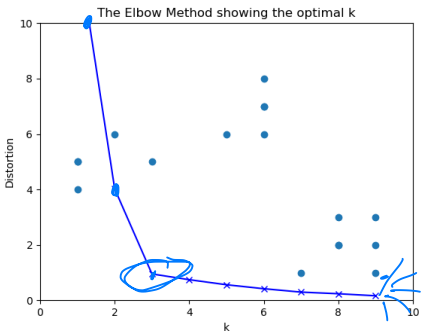

# Hierarchical Clustering
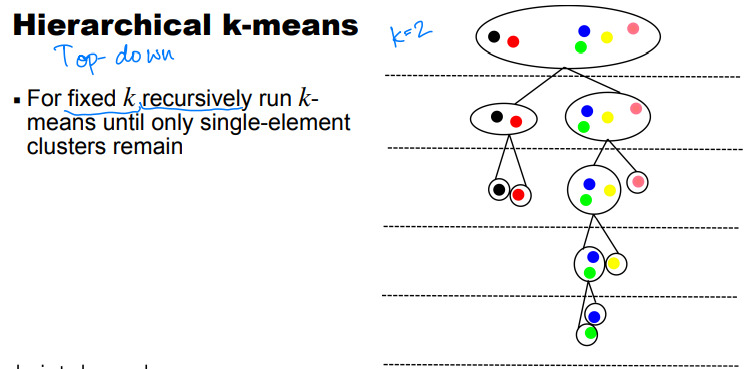

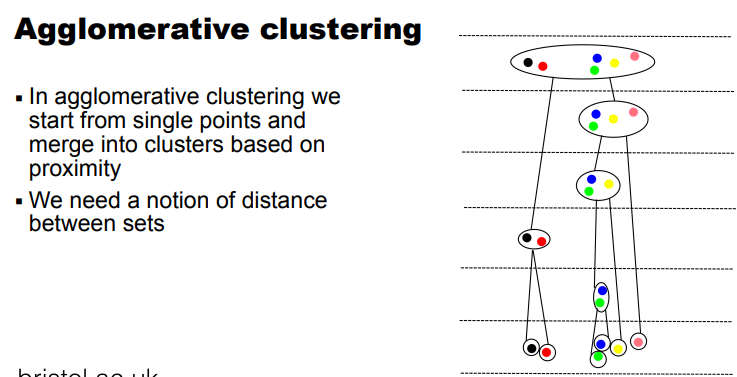

# W15 - DISTANCE BETWEEN SETS (TYPES)

- **Maximum:** max difference between the two sets
- **Minimum:** min difference between the two sets
- **Average:** mean difference between points in the two sets
- **Centroid:** distance between the centroids of the two sets

**agglomerative:** the natural number of clusters is formed by cutting the dengrogram at the point where the similarity between clusters changes the most (slide 27)

# W15 - GAUSSIAN MIXTURE MODELS

- still 2d with multiple peaks (e.g restaurant busy times, lunch and dinner)
- multivariate gaussians (3D peaks or more features than that)

**GMMs have more flexibility in clustering, therefore can be superior to k means** -> cluster data probabilistically

# W16 - Decision Trees

Pick questions at nodes which reduce the entropy the most at each intersection. This in turn means info gained is maximised at each intersection. Supervised learning.

Entropy at the root is not always 1.0. It is based on the number of output classes and how many of the labelled data are of each output class. Entropy at the root is 1.0 if there are two classes with equal numbers of datapoints. We can calculate the entropy using the calculator below.

****
**Random Forests:** more stable than other methods, an ensemble of randomly trained decision trees. Each component tree is randomly different from one another -> individual tree predictions are not correlated, therefore better robustness and generalisation. Each tree in the forest is a weak learner, but take them all together and they are strong learners.

In [ ]:
# Entropy at root calculator.
# for the case where there are two output classes

pc1 = 0.5 # probability of getting class 1 e.g if there are 7 c1 and 3 c2, pc1 = 7/10 = 0.7
pc2 = 1 - pc1
entropy = -(pc1*math.log(pc1,2)+pc2*math.log(pc2,2))
print("entropy at root: ", entropy)

entropy at root:  1.0


In [ ]:
# LAPLACE'S LAW - misclassification probability due to pruning decision tree for greater generalisation

def laplace(k,c):
  if c >= k/2:
    return((k-c+1)/(k+2))
  else:
    print("c is not greater than k/2 therefore not a proper majority class.")
k = 100 # number of patterns at node
c = 92 # c>=k/2 

print("Misclassification Probability: ", laplace(k,c))


c is not greater than k/2 therefore not a proper majority class.
Misclassification Probability:  None


# W16 - Deep Learning

**artifical neuron**

input value -> neuron (calculations) -> activation function (is this neuron's input relevant yes/no) -> Output value

**artificial neural network**

input vector (feature space) -> *hidden layers*: many weighted neurons with same activation function for each -> Output classifications (can be multiple but usually less than dimension of input vector)

A regression task will have a single dimension output which is a value on the scale. 


***

Applications: 

- Audio recognition

- Speech Recognition

- Machine Translation

- Question Answering

- Image Captioning

- Image Recognition

- Action Recognition

- Medical Image Analysis

- Personalised Medicine

***

**Training the Network**: 

*Loss function*: compares the network predictions against the ground truths. Models aim to minimise the loss value.

other keywords: 
Softmax function Cross-entropy Loss function

***

## Network training part 2

For maximum performance, we seek to find an optimum param set **W** of weights which minimises the loss function

### Gradient descent
calculate gradients of loss function J(w) - dJ/dw - and move in the direction of lowering gradient, this is the direction minimising the loss.

computationally expensive, therefore calibrate this based off a single input or small batch

**Can this get stuck in local minima?**
Yes. To overcome this, you increase/decrease learning rate dramatically to jump to another point in the loss function curve and see if you find a lower minima. 

### Back Propagation
using the chain rule recursively to back-propagate gradient calculations layer-by-layer from output back to input. This lets you update the weights for all the hidden layers. BP computes the partial derivatives of each function locally w.r.t. the inputs.
worked example on w16 deep-learning part 2 slides


# W19 - Tree Search
****
**Definitions**
- *admissable*: the expected cost given by any single heuristic at a node is always less than or equal to the actual minimimum cost to reach the goal state from that node

- *Consistent*: the heuristic of node n is less than or equal to the real cost of n to n' plus the heuristic at n' where: 
n -> n' -> goal or further states toward goal. 

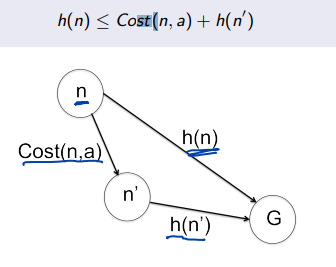

- if a heuristic is consistent, it is by definition also admissible.

- admissibility is a condition for A* search, otherwise, it's just A search. 

- UCS (Uniform Cost Search) is same as A* search without accounting for heuristics. 

# W19 - Search 1

Basics

**depth first**: explor lexographically down to max depth one at a time. add iterative deepening to stop at a chosen depth

**breadth first**: explore lexographically each layer in full before moving down

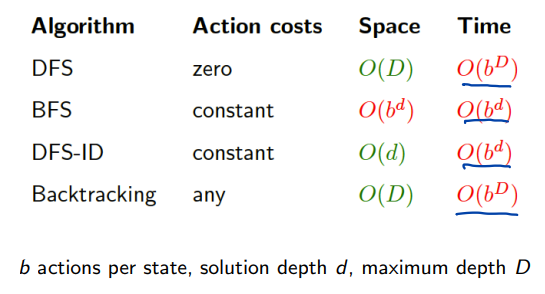



# W19 - Search 2 -> What if cost of each path is not equal 
**INCLUDES**

### Uniform Cost Search: 
expands the
node n with the lowest path cost g(n)

###Informed vs Uninformed search

###Greedy search

A best-first search that uses heuristics only to select the next node to expand

****

Heuristic searches are a form of informed search strategy -> Makes UCS faster leading to A* search. 

A heuristic h(n) is the estimated cost of the cheapest path from the state at
node n to a goal state.


# W19 - Search 3 -> A*, heuristics, relaxation
A* is Best of both: UCS + Greedy,
for it to be A star, heuristic must be **admissible**
A star search is **complete** and **optimal** if the heuristic is admissible.

A∗ takes into account the cost from the root node to the current node and
estimates the path cost from the current node to the goal node
f (n) = g(n) + h(n)

- g(n): path cost from the start node to node n-
- h(n): estimated cost of the cheapest path from n to the goal
- f(n): estimated cost of the cheapest solution through n

**A
∗ distorts costs to favour goal states**

****
## Relaxation
A problem with fewer restrictions on the actions is called a relaxed
problem.

The cost of an optimal solution to a relaxed problem is an admissible
heuristic for the original problem.

relaxation of constraints allows machine learning to predict heuristics for real problems

****
## Heurisic selection
If you have a collection of admissible heuristics, none of which dominate: 
  - choose the heuristic with the maximum value (as it will be closest from the real cost)

- **Dominant:** Let h1 and h2 be two admissible heuristics. if h2(n) ≥ h1(n) for all n, then h2 dominates h1.

the dominant heuristic is superior as it is closest to the real cost


## Creating heuristics:
remove all barriers and use manhatten distance cost. 



# W20 - Bayesian Networks (AKA probability of interdependent events)

(includes dog cake flatmate question)

****
## includes:
* Bayes’s theorem
* Definition of a DAG (or Bayesian network)
* Conditional independence in DAGs
* Dynamic Bayesian networks
* Hidden Markov Models

****

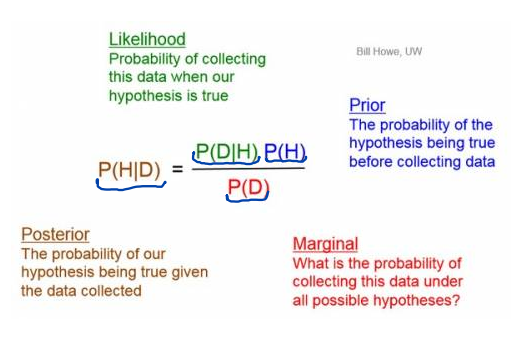

In [ ]:
# BAYES THEORUM - probability of x is this, given y is that.

def Bayes_Theorem(pA, pB, pBA):
    return (pBA * pA) / pB

print(Bayes_Theorem(0.3,0.22,0.5))

0.6818181818181818


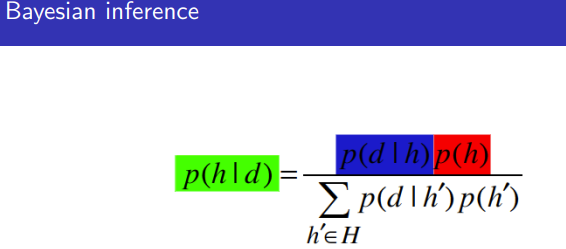

In [ ]:
# Bayesian Inference - same as bayes theorum but with the marginal being the sum of probability of collecting that data under any condition
def Bayes_Interference(pA, pBA, marginal_list):
    return (pBA * pA) / np.sum(marginal_list)

#What is probability dog is loose, given flat mate home and cake eaten?
# P(d = 1 | F=1,C=1 )
dogloose = 0.3 # prob dog loose in general
cakeeaten_if_dogandflatmate_home = 1*0.4 # probability of seeing both cake eaten and flatmate home when dog is loose
marge = [0.3*1*0.4+0.7*0.4*0.9] # list of probabilities of cake being eaten and flat mate home for all possible dog conditions (aka loose and not loose)

# print(Bayes_Inference(dogloose, cakeeaten_if_dogandflatmate_home, marge))


a = 0.4
b = 0.375*0.2
_marge = [0.2*0.375*0.4 + 0.1*0.375*0.6]

print(Bayes_Inference(a,b,_marge))


0.5714285714285715


# Simple probabilities

3 red, 1 blue ball

given ball one was red, what is the probability ball two is red?

remaining are 2 red, 1 blue, so probability ball 2 is red is: **2/3**

## Use logic when you can. 
****

# Bayesian Networks
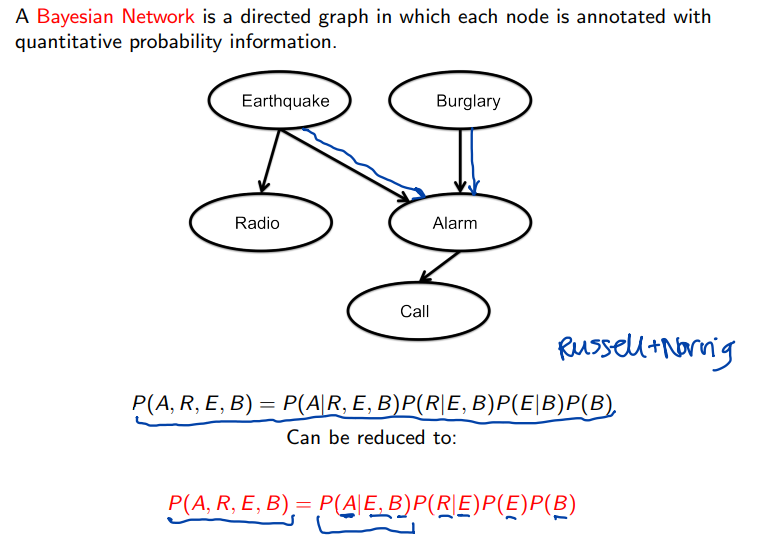


In [ ]:
# Bayesian Network - redefine for each one you have
"""
What is the probability of all these linked things happening?

It is the probability of all resultant events happening given their causal
events have happened, multiplied by the probability that the causal events will 
happen in the first place

for above, if every probability is o.5

"""
earthquake = 0.5
burglary = 0.5
radio = 0.5
earthquake_alarm = 0.5
burglary_alarm = 0.5
alarm_either = 1- (0.5*0.5) # 75% chance one of these will trigger the alarm

# what is probability that the there is an earthquake and burglary and the 
# alarm triggers and the radio triggers?
prob = alarm_either*radio*earthquake*burglary

print(alarm_either)
print(prob)




0.75
0.09375


# W20 - Marginalisation

marginalisation of a leaf node gives the network, without the node. It is used to show whether or not previous nodes (events) are independent of each other. 

The example below shows B and E are independent of each other.
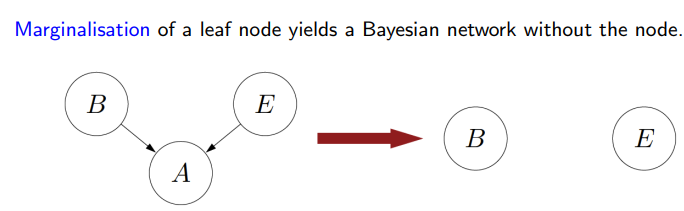


****
# Variable elemination
consider the actual possible causes for the event you want to find the probability of, e.g what is probability sprinklers are on here:
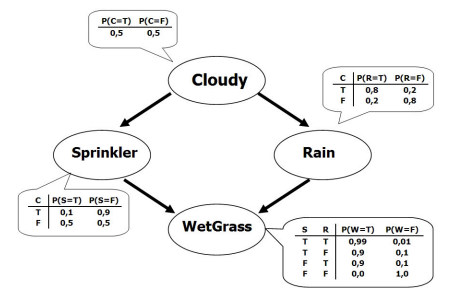

only relevent causal event is whether it's cloudy or not - 50% chance either way. If cloudy, 10% chance sprinklers turn on. If not cloudy, 50% chance sprinklers turn on. Therefore probability sprinklers on at all is

P = notcloudy * probSprinksOnIfNotCloudy    +    cloudy * probSprinksOnIfCloudy

P = 0.5*0.5 + 0.5*0.1 = 0.3

# W20 Further Methods

**Markov chain:** sequence of random variables each conditionally dependent only
on the previous

**Dynamic Bayesian Networks (DBNs)** are directed graphical models of
stochastic processes

The simplest kind of DBN is a **Hidden Markov Model (HMM)**, which has one
discrete hidden node and one discrete or continuous observed node per slice

Hidden Markov models allow us to infer the presence of hidden variables
based on the output they produce - Used for speech recognition

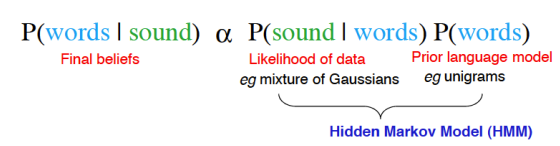

#W21 - Markov Decision Processes

This is **GRID WORLD QUESTIONS** -> mock q8

MDPs form the foundation of reinforcement learning. 

## Applications
- Cleaning robot
- Autonomous aircraft navigation
- Games
- Network switching and routing
- Travel route planning
- Models of animals
****

**Policy:** The solution which describes what the robot does in every state. 

**Optimal** policy is one that yields the highest expected utility, denoted by π∗

Finite horizon means after a fixed time, nothing matters -> leads to non-stationary policies where the time matters.

Infinite horizon means no fixed deadline, therefore leading to stationary policies where time at state doesn't matter. 

**Discount Factor** Rewards in the future are worth less than rewards now. Therefore discount factor will be 0 < gamma < 1 and multiply by the utility of possible future actions. Therefore, the more distant a future reward is, the less significant. Also means that the utility of infinite sequences is still finite -> converges.

Discounted utilities + infinite horizons → optimal policy is independent of the starting state

**BELLMAN EQUATIONS**
Tells us the utility of each possible state at a given time based on its current reward and sum the potitential utility of future states from this state, multiplied by the probability of these states being chosen.

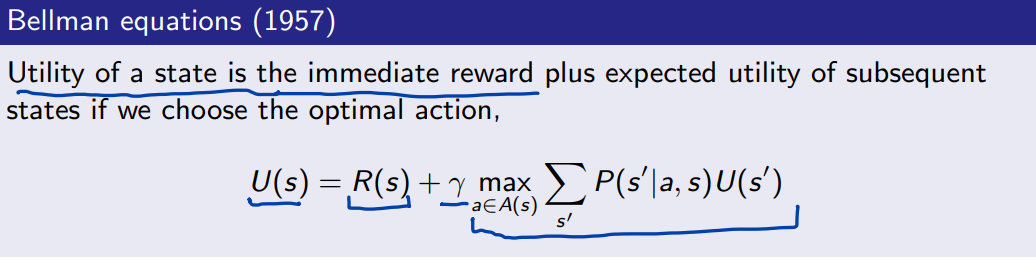

# W21 - MDPs Continued
Value iteration allows us to find the best policy by iteratively updating the
value (utility) at each cell.

We calculate the value of each cell based on the previous values.

## Policy Iteration

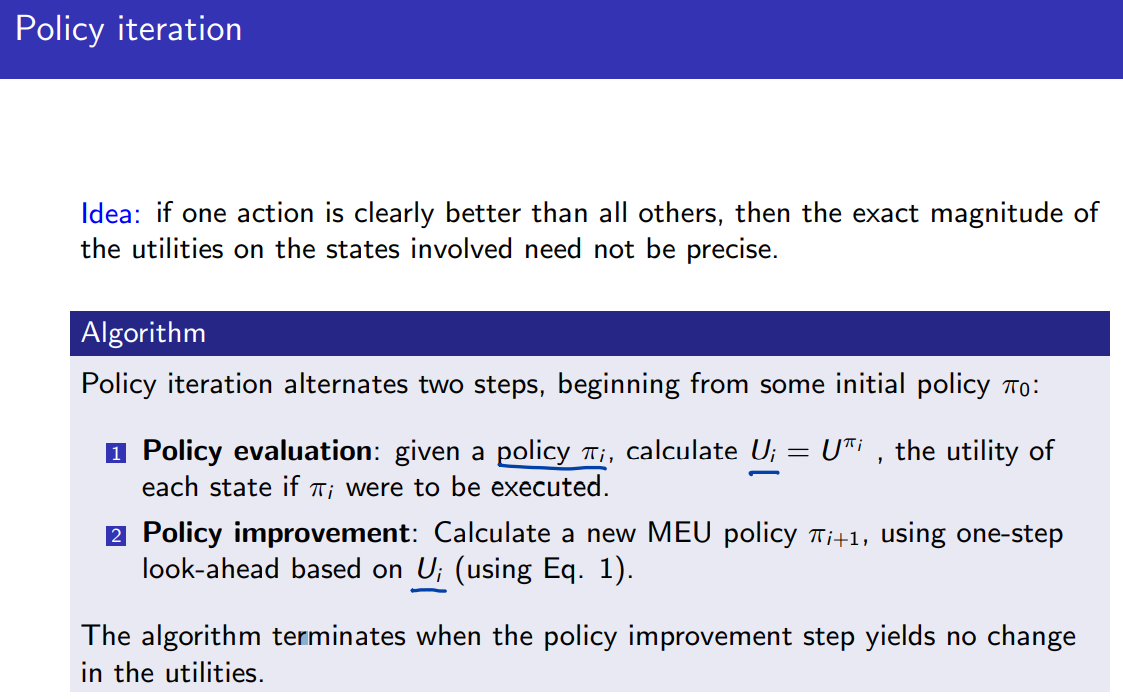

In [ ]:
# MARKOV DECISION PROCESS UTILITY CALCULATOR

# fixed probabilities and discount factor
p_forward = 0.8
discount_factor = 0.9

# either 
# p_backward = 0.1
# or
p_LR = 0.1


# reward in current state and utilities for forward and perpendicular directions
reward = 0
u_forward = 10

# either
# u_backward = 5.90

# or
u_L = -100
u_R = -100

# if forward left right
Utility_in_Next_Time_Step = reward + discount_factor*(p_forward*u_forward + p_LR*u_L + p_LR*u_R)

# if forward backward
# Utility_in_Next_Time_Step = reward + discount_factor*(p_forward*u_forward + p_backward*u_backward)

print("Utility at next time step is: ", Utility_in_Next_Time_Step)

Utility at next time step is:  -10.8


# When are MDPs Good?
MDPs are great, if
- we know the state transition function P(s'|a,s)
- we know the reward function R(s)
****
# Reinforcement Learning
Reinforcement learning is **on-line** methodology that we use when the **model of world is unknown** and/or **rewards are delayed.**

## Options:

### Naive approach
act randomly to learn transition model and reward function, then impliment value iteration and policy iteration.
- Exploration vs Exploitation
- Model-based reinforcement learning


## Model-free reinforcement learning
- **Q learning:** An action-value function Q(s,a) says how good it is to be in a state, take an action, and thereafter follow a policy.

- **Deep Q learning:** Approximate the action-value function with a neural network with weights w: Q(s, a, w)


- **TD learning:** Temporal difference learning

# W22 - Nature Inspired Compututation
## Natural computation
## Evolutionary Algorithms

****
### Applications
- traffic modelling
- living systems modelling or reconstruction
- music composition 
- artificial life in art, games and robots
- university classroom scheduling

****
## Evolutionary Algorithms


1. Fill the environment with individuals of a given population size
2. individual fitness is based on environment and how well they achieve their goals
3. parents are chosen, their traits combined to create offspring
4. only the fittest individuals survive each iteration, overall population moves toward a better fit

## Offspring changes
- **Crossover:** combine one part from each parent
- **Mutation:** a section/trait in the offspring changes randomly
  - swap mutation: Swap Mutation: Select two positions and swap them






# W22 - Binary Value Crossovers & Mutations

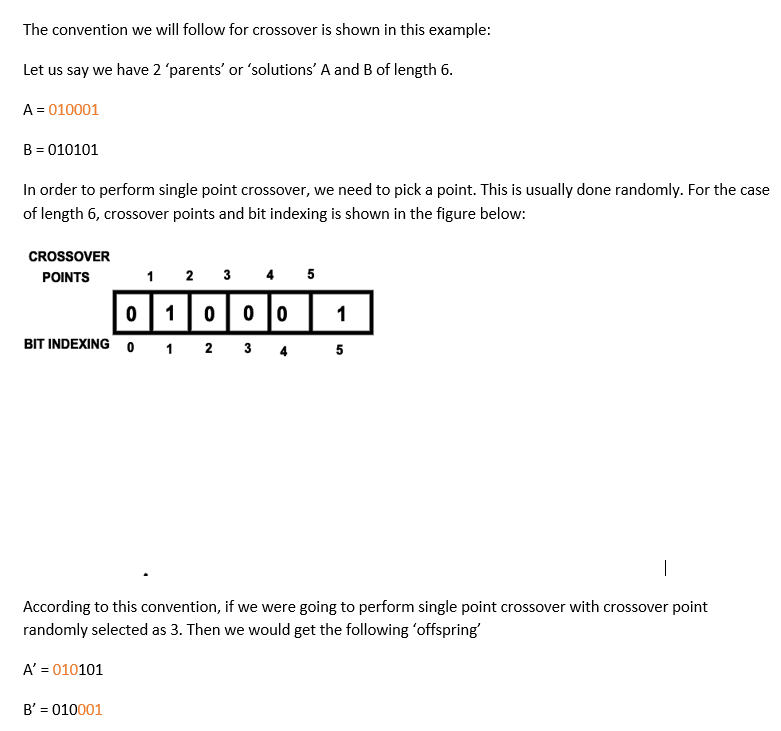


In [ ]:
# Evolutionary Algorithms: Offspring maker calculator

# string as easier to type in without mistakes
parent_A = "1101001"
parent_B = "1010010"

# convert binary to integer
print(parent_A,parent_B," Starting values: \n")
print(int(parent_A, 2))
print(int(parent_B, 2))

child_1 = []
child_2 = []

# expects parents as strings - one point crossover
def crossover(point, parent1, parent2):
  list_1 = list(parent1)
  list_2 = list(parent2)
  for i in range(point):
    child_1.append(list_1[i])
    child_2.append(list_2[i])

  for j in range(len(list_1) - point):
    child_1.append(list_2[j+point])
    child_2.append(list_1[j+point]) 

# # can take either string or list for input, will output list  - bitwise mutation
# def mutation(list_of_points, binary):
#   if type(binary) != list:
#     binary = list(binary)
#   for i in range(len(binary)):
#     for j in list_of_points:
#       if i == j:
#         if binary[i] == "0":
#           binary[i] = "1"
#         else:
#           binary[i] = "0"
#   return(binary)

def swap_mutation(binary, pos1, pos2):
    if type(binary) != list:
      binary = list(binary)
     
    binary[pos1], binary[pos2] = binary[pos2], binary[pos1]
    return binary





#Apply functions:
crossover(3, parent_A, parent_B)
print("after crossover: ")
print("".join(child_1))
print("".join(child_2))
print("\n")
child_1 = swap_mutation(child_1,2,4)

child_2 = swap_mutation(child_2,3,6)









# print results
child_1 = "".join(child_1)
child_2 = "".join(child_2)

child_1_integer = int(child_1, 2)
child_2_integer = int(child_2, 2)

print("Child 1 Binary: ", child_1)
print("Child 1 Integer value: ", child_1_integer,"\n")

print("Child 2 Binary: ", child_2)
print("Child 2 Integer value: ", child_2_integer,"\n")

1101001 1010010  Starting values: 

105
82
after crossover: 
1100010
1011001


Child 1 Binary:  1100010
Child 1 Integer value:  98 

Child 2 Binary:  1011001
Child 2 Integer value:  89 



# Evolutionary algorithms
- offspring creation can be done as with the code above (simple). This shows single point crossover and bitwise mutation. Also can be done with:
  - n-point crossover
  - uniform crossover
  - uniform mutation

## survivor selection
you have N parents, plus n offspring -> you need to reduce back to N survivors at the end of each iteration


**2 strategies:**
- age based -> new offspring replace the oldest parents
- fitness based -> if you have N parents and n new offspring, keep only the N fittest in the population of both parents and offspring




In [ ]:
from numpy.lib.function_base import append
# FITNESS CALCULATOR

def fitness_function(x):
  return(-x**(2) + 102*x -2)

# list of x values corresponding to individuals a-e
xValues = [1.11,0.63,5.35,10.2,4.28]

# variable to store fitness value sum
fitness_sum = 0


print("absolute fitness values: ")
for i in xValues:
  print(fitness_function(i))
  fitness_sum += fitness_function(i)

test = 0
relative_list = []
print("\n relative fitness values: ")
for i in xValues:
  relative = round(fitness_function(i)/fitness_sum,3)
  print(relative)
  test += relative
  relative_list.append(relative)

# print(test)

# print("\n ordered and accumlated for roulette wheel selection: ")
# relative_list[0], relative_list[1], relative_list[2], relative_list[3], relative_list[4] = relative_list[3], relative_list[0], relative_list[2], relative_list[1], relative_list[4]
# wheel_regions = 0
# for i in relative_list:
#   print(wheel_regions+0.001)
#   print(" - ")
#   wheel_regions += i
#   print(wheel_regions, "\n")
  

absolute fitness values: 
109.98790000000001
61.8631
515.0775
934.3599999999999
416.2416

 relative fitness values: 
0.054
0.03
0.253
0.459
0.204


# Practice Questions

## Mock Exam Question 8 Tutorial: Markov Decision Processes

**clarification on agent movement directions**
slide 8 markove decision process why is answer 0.8^5: because 0.8 does not mean up, it means the prob of going in the direction it desires to go. Therefore prob of taking 5 consecutive steps in the desired directions is 0.8^5 = 0.3276.

****

Q8. agent in 2x3 grid world

2	     -0.5  10(G)

-0.5	-0.5	-0.5

top right is goal, 0.8 prob of desired direction movement

utility set = reward at t=0

Gamma = 0.9 is the discount factor

find utility at t = 1 for various cells (going from t= 0 to t = 1)

- **Utility of state S = reward at S + Gamma(maximising future utility if the best possible action is taken)**

- know goal state utility as agent stops at the goal therefore no future moves, u(Goal) = reward = 10.

- For cell 1,2: reward is -0.5, if you're in that cell, no best action so arbitrarily pick up. U(1,2) = -0.5 + 0.9(-0.5) = -0.95

- For cell 1,3: reward is -0.5, optimal action if you're in that state is head to goal state (go up), but we only have 0.8 chance of successfully doing this, need to add the chances of unsuccessfully doing it too.  
u(1,3) = -0.5 + 0.9(0.8x10 + 0.1x(-0.5) + 0.1x(-0.5)) = 6.61

- for cell 2,1 - best action is not to move to the cells, by choosing either up or left, : u(2,1) = 2 + 0.9(0.8x2 + 0.1x2 + 0.1x(-0.5)) = 3.575 

- u(2,2) = 6.61 (same as 1,3 really)

**Part 2**: agent will not try to reach the goal after convergence as every other state has a higher utility that the goal state. 



# W20 - quiz question 2

| Explored | Frontier | Paths                          |
|----------|----------|--------------------------------|
| s        | ac       | sa 11, sc 10                   |
| sc       | adg      | sa 11, scd 12, scg 11          |
| sca      | dgb      | sab 12, sad 11, scd 12, scg 11 |
| scad     | gbe      | sab 12, sad 11, scd 12, **scg 11** |
| **scadg**    |          |                                |

so the nodes explored are: **scadg** (from the explored column)
and the path taken is the first only one which reaches the goal: **scg 11**

# Mock exam Q4: 

ucs is just A* ignoring the heuristics, 

explored in bold shows the explored order 

paths  final bold bit shows you the path to the goal



| Explored   | Frontier | Paths - with sum cost   |
|------------|----------|-------------------------|
| h          | cab      | hc 1.7, ha 1.8, hb 1.8  |
| hc         | uab      | hcu 3.2, ha 1.8, hb 1.8 |
| hca        | uqb      | hcu 3.2, hb 1.8, haq 2  |
| hcab       | uq       | hcu 3.2, haq 2          |
| hcabq      | ug       | hcu 3.2, **haqg 2.9**   |
| **hcabqg** |          |                         |


# Mock exam Q5

A* search sums the path cost and the heuristic at the frontier

explored in bold shows the explored order 

paths  final bold bit shows you the path to the goal



| Explored  | Frontier | Paths - with sum cost of path so far and heuristic          |
|-----------|----------|---------------------------------|
| h         | cab      | hc 3.2, ha 2.8, hb 2.6          |
| hb        | ca       | hc 3.2, ha 2.8, hba 2.8         |
| hba       | cq       | hc 3.2, haq 2.75, hbaq 3.75     |
| hbaq      | cg       | hc 3.2, **haqg 2.9**, hbaqg 3.9 |
| **hbaqg** |          |                                 |
|           |          |                                 |
|           |          |                                 |